In [72]:
from utils import *
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

In [73]:
data = importpdrange(0, 10)
print (data)

importing event  1
importing event  2
importing event  3
importing event  4
importing event  5
importing event  6
importing event  7
importing event  8
importing event  9
importing event  10
        pt    eta    phi  charge
0    1.094 -0.085 -3.055       1
1    1.418  1.417 -3.025       1
2    1.438 -1.569 -2.996       1
3    1.132 -1.061 -2.986       1
4    2.352 -0.350 -2.867       1
..     ...    ...    ...     ...
406  1.003 -1.827  1.182       1
407  0.961 -1.845  1.462      -1
408  1.016  1.913  2.364       1
409  2.052 -2.003 -1.609       1
410  1.277 -2.358  2.569       1

[3717 rows x 4 columns]


0     -3.055
1     -3.025
2     -2.996
3     -2.986
4     -2.867
       ...  
406    1.182
407    1.462
408    2.364
409   -1.609
410    2.569
Name: phi, Length: 3717, dtype: float64


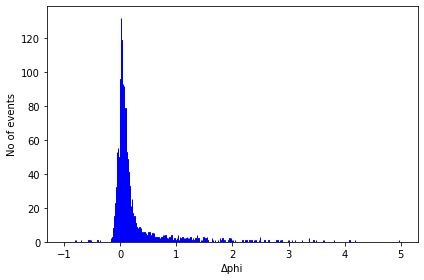

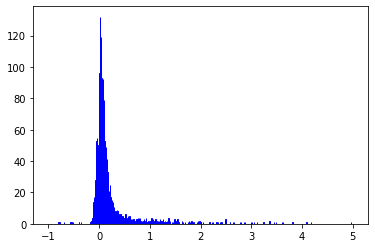

In [74]:
phi = data[data.columns[2]]
dphi = np.diff(phi)
print (phi)
nbins = 1000
xmin = -1
xmax = 5
plt.hist(dphi,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
plt.ylabel(r'No of events')
plt.xlabel(r'Δphi')
plt.tight_layout()  
plt.show()
counts1, bins, bars= plt.hist(dphi,nbins,color="white", edgecolor="blue",range = [xmin,xmax])


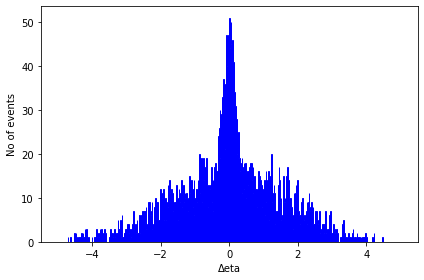

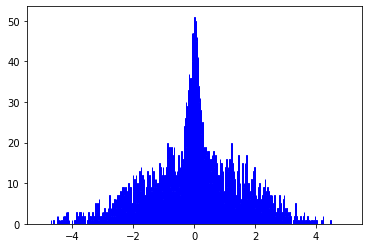

In [75]:
eta = data[data.columns[1]]
deta = np.diff(eta)
nbins = 500
xmin = -5
xmax = 5
plt.hist(deta,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
plt.ylabel(r'No of events')
plt.xlabel(r'Δeta')
plt.tight_layout()  
plt.show()
counts2, bins, bars2 = plt.hist(deta,nbins,color="white", edgecolor="blue",range = [xmin,xmax])


(66,) (70,) (66, 70)


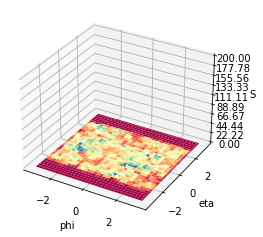

In [76]:
def surfacedata(dfdata, dphi = 0.5, deta = 0.5, rangex=4, rangey=4):
    phi_c = math.ceil(rangex*2/dphi)
    eta_c = math.ceil(rangey*2/deta)
    phi_data = np.arange(-rangex, rangex, dphi)+dphi/2
    eta_data = np.arange(-rangey, rangey, deta)+deta/2
    z_data = np.zeros([phi_c, eta_c], dtype=int)
    for index,instance in dfdata.iterrows():
        if instance['phi'] > rangex or instance['phi'] < -rangex or instance['eta'] > rangey or instance['eta'] < -rangey:
            continue
        phi_index = math.floor((instance['phi']+rangex)/dphi)
        eta_index = math.floor((instance['eta']+rangey)/deta)
        z_data[phi_index][eta_index] += 1
    return phi_data, eta_data, z_data
event_a_x, event_a_y, event_a_z = surfacedata(data, dphi=0.1, deta=0.1, rangex=3.3, rangey=3.5)
print(event_a_x.shape, event_a_y.shape, event_a_z.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_a_x
Y = event_a_y
X, Y = np.meshgrid(X, Y)
Z = event_a_z.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 200)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('phi')
ax.set_ylabel('eta')
ax.set_zlabel('S')

# Add a color bar which maps values to colors.

plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


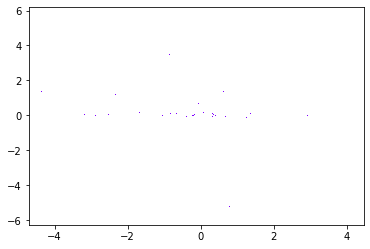

In [77]:
counts,xbins,ybins,image = plt.hist2d(deta,dphi,bins=3305,norm=LogNorm(), cmap = plt.cm.rainbow)
print (counts)

In [ ]:
fig = plt.figure(figsize=(12,6))


ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_title('Wireframe plot')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_title('Surface plot')

plt.tight_layout()

plt.show()

(66,) (70,) (66, 70)


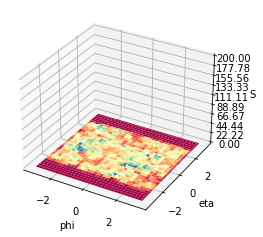

In [78]:
def surfacedata(dfdata, dphi = 0.5, deta = 0.5, rangex=4, rangey=4):
    phi_c = math.ceil(rangex*2/dphi)
    eta_c = math.ceil(rangey*2/deta)
    phi_data = np.arange(-rangex, rangex, dphi)+dphi/2
    eta_data = np.arange(-rangey, rangey, deta)+deta/2
    z_data = np.zeros([phi_c, eta_c], dtype=int)
    for index,instance in dfdata.iterrows():
        if instance['phi'] > rangex or instance['phi'] < -rangex or instance['eta'] > rangey or instance['eta'] < -rangey:
            continue
        phi_index = math.floor((instance['phi']+rangex)/dphi)
        eta_index = math.floor((instance['eta']+rangey)/deta)
        z_data[phi_index][eta_index] += 1
    return phi_data, eta_data, z_data
event_a_x, event_a_y, event_a_z = surfacedata(data, dphi=0.1, deta=0.1, rangex=3.3, rangey=3.5)
print(event_a_x.shape, event_a_y.shape, event_a_z.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_a_x
Y = event_a_y
X, Y = np.meshgrid(X, Y)
Z = event_a_z.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 200)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('phi')
ax.set_ylabel('eta')
ax.set_zlabel('S')

# Add a color bar which maps values to colors.

plt.show()

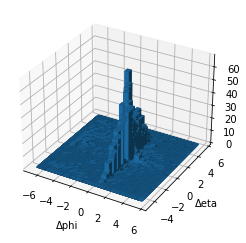

In [79]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = dphi
y = deta
hist, xedges, yedges = np.histogram2d(x, y, bins=100, range=[[-7, 5], [-5, 5]])


xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0


dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.xlabel(r'Δphi', fontsize = 10)
plt.ylabel(r'Δeta', fontsize = 10)
plt.show()